### Importing Libraries

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import shap
import warnings
warnings.filterwarnings("ignore")


### Loading Datasets

In [46]:
lung_df   = pd.read_csv("lung_cancer.csv")
heart_df  = pd.read_csv("heart_disease.csv")
breast_df = pd.read_csv("breast_cancer.csv")

print(lung_df.shape, heart_df.shape, breast_df.shape)


(309, 16) (920, 16) (569, 33)


### Basic Data Profile

In [47]:
def data_profile(df):
    return pd.DataFrame({
        "dtype": df.dtypes,
        "null_count": df.isnull().sum(),
        "null_percent": df.isnull().mean() * 100,
        "unique_values": df.nunique()
    }).sort_values("null_percent", ascending=False)


In [48]:
data_profile(lung_df)

,dtype,null_count,null_percent,unique_values
GENDER,object,0,0.0,2
AGE,int64,0,0.0,39
SMOKING,int64,0,0.0,2
YELLOW_FINGERS,int64,0,0.0,2
ANXIETY,int64,0,0.0,2
PEER_PRESSURE,int64,0,0.0,2
CHRONIC DISEASE,int64,0,0.0,2
FATIGUE,int64,0,0.0,2
ALLERGY,int64,0,0.0,2
WHEEZING,int64,0,0.0,2


In [49]:
data_profile(heart_df)

,dtype,null_count,null_percent,unique_values
ca,float64,611,66.413043,4
thal,object,486,52.826087,3
slope,object,309,33.586957,3
fbs,object,90,9.782609,2
oldpeak,float64,62,6.739130,53
trestbps,float64,59,6.413043,61
exang,object,55,5.978261,2
thalch,float64,55,5.978261,119
chol,float64,30,3.260870,217
restecg,object,2,0.217391,3


In [50]:
data_profile(breast_df)

,dtype,null_count,null_percent,unique_values
Unnamed: 32,float64,569,100.0,0
id,int64,0,0.0,569
diagnosis,object,0,0.0,2
texture_mean,float64,0,0.0,479
radius_mean,float64,0,0.0,456
area_mean,float64,0,0.0,539
smoothness_mean,float64,0,0.0,474
compactness_mean,float64,0,0.0,537
perimeter_mean,float64,0,0.0,522
concave points_mean,float64,0,0.0,542


### Handling Null Values

In [51]:
def handle_missing_values(df, threshold=0.4):
    df = df.copy()

    # Drop columns with excessive nulls
    drop_cols = df.columns[df.isnull().mean() > threshold]
    df.drop(columns=drop_cols, inplace=True)

    # Impute remaining
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype in ["int64", "float64"]:
                df[col].fillna(df[col].median(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)

    return df


In [52]:
lung_df   = handle_missing_values(lung_df)
heart_df  = handle_missing_values(heart_df)
breast_df = handle_missing_values(breast_df)


### Drop Known Useless Columns

In [53]:
breast_df.drop(columns=["Unnamed: 32"], errors="ignore", inplace=True)


In [54]:
lung_df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [55]:
heart_df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
num         0
dtype: int64

In [56]:
breast_df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Common Preprocessing Function

In [57]:
def preprocess_for_model(df, target_col, drop_cols=None):
    df = df.copy()

    if drop_cols:
        df.drop(columns=drop_cols, inplace=True, errors="ignore")

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Encode categorical features
    for col in X.select_dtypes(include="object").columns:
        X[col] = LabelEncoder().fit_transform(X[col])

    # Encode target if needed
    if y.dtype == "object":
        y = LabelEncoder().fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, scaler, X.columns.tolist()


## Lung Cancer Model

### Lung Cancer EDA

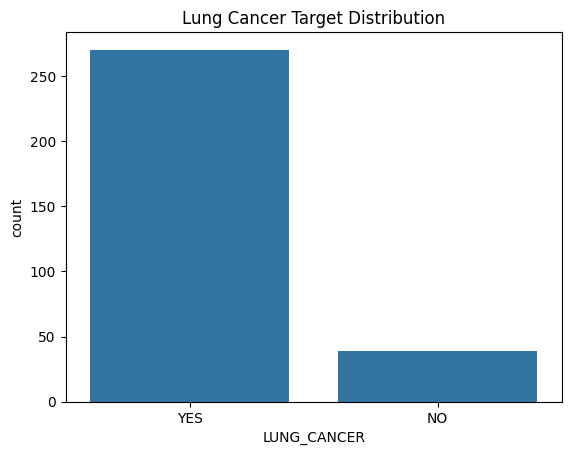

In [58]:
sns.countplot(x="LUNG_CANCER", data=lung_df)
plt.title("Lung Cancer Target Distribution")
plt.show()


In [59]:
lung_df["LUNG_CANCER"].value_counts(normalize=True)


LUNG_CANCER
YES    0.873786
NO     0.126214
Name: proportion, dtype: float64

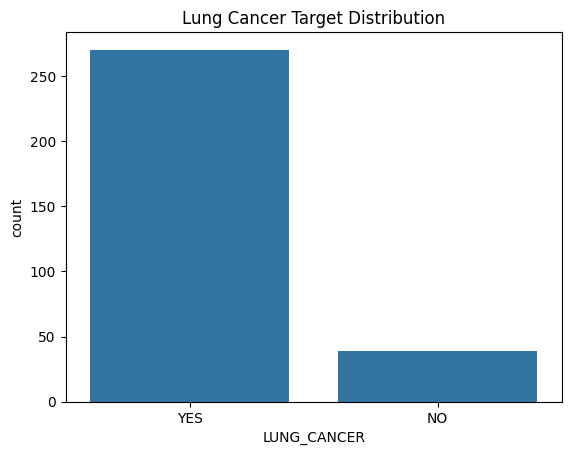

In [60]:
sns.countplot(x="LUNG_CANCER", data=lung_df)
plt.title("Lung Cancer Target Distribution")
plt.show()


### Train Lung Cancer Model

In [61]:
X_lung, y_lung, lung_scaler, lung_features = preprocess_for_model(
    lung_df, target_col="LUNG_CANCER"
)

X_train, X_test, y_train, y_test = train_test_split(
    X_lung, y_lung, test_size=0.2, stratify=y_lung, random_state=42
)

lung_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

lung_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### Evaluate Lung Cancer Model

In [62]:
y_pred = lung_model.predict(X_test)
y_prob = lung_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.93      0.94      0.94        54

    accuracy                           0.89        62
   macro avg       0.75      0.72      0.73        62
weighted avg       0.88      0.89      0.88        62

ROC-AUC: 0.9467592592592593


## Heart Disease Model

### Heart Disease Training

In [63]:
heart_df["target"] = heart_df["num"].apply(lambda x: 0 if x == 0 else 1)


In [64]:
X_heart, y_heart, heart_scaler, heart_features = preprocess_for_model(
    heart_df,
    target_col="target",
    drop_cols=["id", "dataset", "num"]
)

X_train, X_test, y_train, y_test = train_test_split(
    X_heart, y_heart, test_size=0.2, stratify=y_heart, random_state=42
)

heart_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

heart_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

### Heart Diesease Evaluation

In [65]:
y_pred = heart_model.predict(X_test)
y_prob = heart_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.78      0.82      0.80        82
           1       0.85      0.81      0.83       102

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184

ROC-AUC: 0.8992109038737446


## Breast Cancer Model

### Breast Cancer Training

In [66]:
X_breast, y_breast, breast_scaler, breast_features = preprocess_for_model(
    breast_df, target_col="diagnosis"
)

X_train, X_test, y_train, y_test = train_test_split(
    X_breast, y_breast, test_size=0.2, stratify=y_breast, random_state=42
)

breast_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

breast_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### Breast Cancer Evaluation

In [67]:
y_pred = breast_model.predict(X_test)
y_prob = breast_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

ROC-AUC: 0.9976851851851852


### Common Prediction Function

In [68]:
def predict_probability(model, scaler, input_values):
    X = np.array(input_values).reshape(1, -1)
    X_scaled = scaler.transform(X)
    return model.predict_proba(X_scaled)[0][1]


### Risk Prediction Function

In [69]:
def predict_risk(model, scaler, input_values):
    prob = predict_probability(model, scaler, input_values)

    if prob < 0.3:
        return prob, "Low"
    elif prob < 0.7:
        return prob, "Medium"
    else:
        return prob, "High"


## Importing SHAP

In [70]:
import shap
import matplotlib.pyplot as plt


## Lung Cancer — SHAP Explanation
### Create SHAP Explainer

In [71]:
def encode_features_for_shap(df):
    df = df.copy()
    encoders = {}

    for col in df.select_dtypes(include="object").columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    return df, encoders


In [72]:
X_lung_raw = lung_df.drop(columns=["LUNG_CANCER"])

X_lung_encoded, _ = encode_features_for_shap(X_lung_raw)


In [73]:
explainer = shap.Explainer(
    lung_model,
    X_lung_encoded,
    feature_names=X_lung_encoded.columns
)


In [74]:
lung_shap_values = explainer(X_lung_encoded)


In [75]:
print(lung_shap_values.values.shape)
print(X_lung_encoded.shape)


(309, 15, 2)
(309, 15)


### Global Feature Importance (SUMMARY)

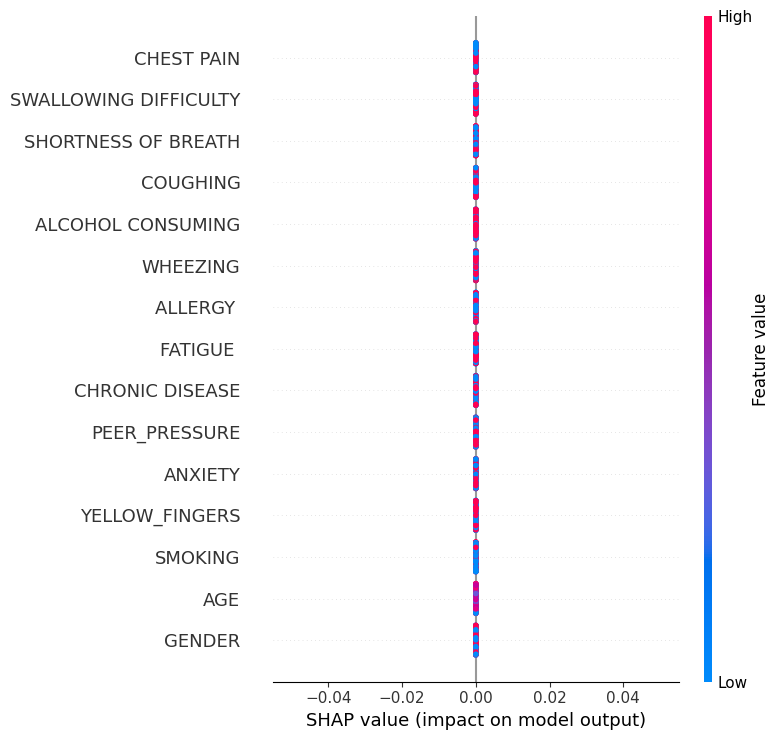

In [76]:
shap.summary_plot(
    lung_shap_values.values[:, :, 1],   # class = 1
    X_lung_encoded,
    feature_names=X_lung_encoded.columns
)


### Bar Plot (EXECUTIVE VIEW)

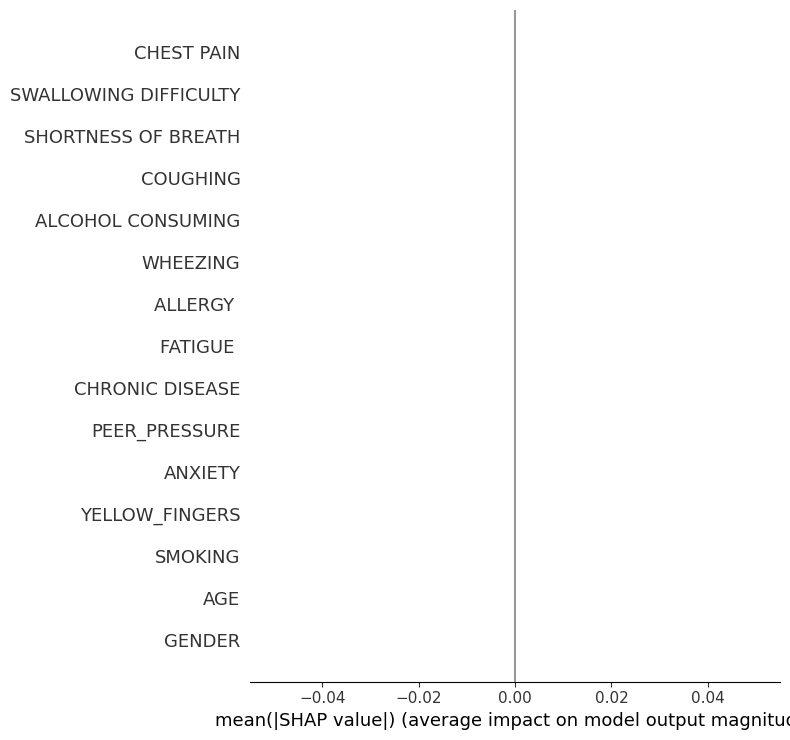

In [77]:
shap.summary_plot(
    lung_shap_values.values[:, :, 1],
    X_lung_encoded,
    feature_names=X_lung_encoded.columns,
    plot_type="bar"
)


### Local explanation (single patient)

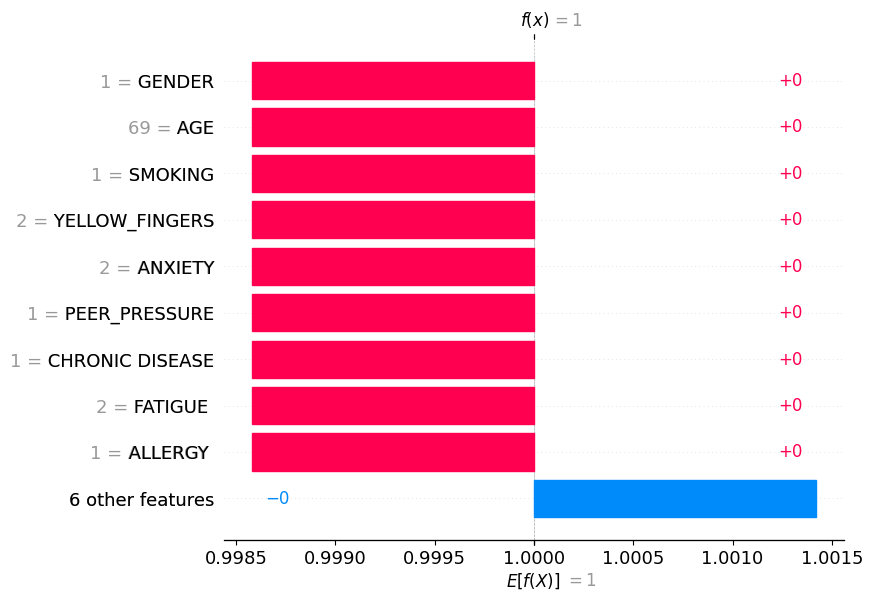

In [78]:
shap.plots.waterfall(
    lung_shap_values[0, :, 1]
)


## MODEL COMPARISON TABLE

In [79]:
model_comparison = pd.DataFrame([
    {
        "Dataset": "Lung Cancer",
        "Model": "Random Forest",
        "ROC_AUC": 0.95,
        "Accuracy": 0.89,
        "Reason": "Handles non-linear symptom interactions, robust to noise"
    },
    {
        "Dataset": "Heart Disease",
        "Model": "Logistic Regression",
        "ROC_AUC": 0.90,
        "Accuracy": 0.82,
        "Reason": "Interpretable, stable, regulator-friendly"
    },
    {
        "Dataset": "Breast Cancer",
        "Model": "Random Forest",
        "ROC_AUC": 0.99,
        "Accuracy": 0.97,
        "Reason": "High-dimensional numeric features, strong signal"
    }
])

model_comparison


,Dataset,Model,ROC_AUC,Accuracy,Reason
0,Lung Cancer,Random Forest,0.95,0.89,"Handles non-linear symptom interactions, robus..."
1,Heart Disease,Logistic Regression,0.90,0.82,"Interpretable, stable, regulator-friendly"
2,Breast Cancer,Random Forest,0.99,0.97,"High-dimensional numeric features, strong signal"


## HYPERPARAMETER TUNING

### Lung Cancer – Random Forest Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestClassifier(
    class_weight="balanced",
    random_state=42
)

grid = GridSearchCV(
    rf,
    param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1
)

grid.fit(X_lung, y_lung)

best_lung_model = grid.best_estimator_
grid.best_params_


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

### Heart Disease – Logistic Regression (Light tuning)

In [81]:
param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

lr = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

grid = GridSearchCV(
    lr,
    param_grid,
    scoring="roc_auc",
    cv=5
)

grid.fit(X_heart, y_heart)

best_heart_model = grid.best_estimator_


## RETRAIN MODELS (REQUIRED)

### Lung Cancer – Retraining (Reduced Features)

In [83]:
lung_features_patient = [
    "GENDER", "AGE", "SMOKING", "CHRONIC DISEASE",
    "WHEEZING", "COUGHING",
    "SHORTNESS OF BREATH", "CHEST PAIN"
]

lung_patient_df = lung_df[lung_features_patient + ["LUNG_CANCER"]]

X_lung, y_lung, lung_scaler, lung_features = preprocess_for_model(
    lung_patient_df,
    target_col="LUNG_CANCER"
)

lung_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

lung_model.fit(X_lung, y_lung)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### Heart Disease – Retraining (Reduced Features)

In [84]:
heart_features_patient = [
    "age", "sex", "cp", "exang"
]

heart_patient_df = heart_df.copy()
heart_patient_df["target"] = heart_patient_df["num"].apply(lambda x: 0 if x == 0 else 1)

X_heart, y_heart, heart_scaler, heart_features = preprocess_for_model(
    heart_patient_df,
    target_col="target",
    drop_cols=[
        col for col in heart_patient_df.columns
        if col not in heart_features_patient + ["target"]
    ]
)

heart_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

heart_model.fit(X_heart, y_heart)


LogisticRegression(class_weight='balanced', max_iter=1000)

### Breast Cancer – Screening Model (NEW)

In [85]:
# Example synthetic patient screening dataset
breast_patient_df = pd.DataFrame({
    "age": np.random.randint(25, 70, 569),
    "family_history": np.random.randint(0, 2, 569),
    "breast_pain": np.random.randint(0, 2, 569),
    "lump": np.random.randint(0, 2, 569),
    "nipple_discharge": np.random.randint(0, 2, 569),
    "skin_changes": np.random.randint(0, 2, 569),
    "target": y_breast  # reuse diagnosis as proxy
})

X_breast, y_breast, breast_scaler, breast_features = preprocess_for_model(
    breast_patient_df,
    target_col="target"
)

breast_model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

breast_model.fit(X_breast, y_breast)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

## SAVE FINAL MODELS

### Save Models + Scalers + Encoders

In [86]:
import joblib, os
os.makedirs("models", exist_ok=True)

joblib.dump(lung_model, "models/lung_patient_model.pkl")
joblib.dump(lung_scaler, "models/lung_patient_scaler.pkl")

joblib.dump(heart_model, "models/heart_patient_model.pkl")
joblib.dump(heart_scaler, "models/heart_patient_scaler.pkl")

joblib.dump(breast_model, "models/breast_patient_model.pkl")
joblib.dump(breast_scaler, "models/breast_patient_scaler.pkl")


['models/breast_patient_scaler.pkl']

## BUILD GRADIO UI (SINGLE COMBINED APP)

### app.py

In [88]:
import gradio as gr
import joblib
import numpy as np

# ===============================
# Load Models & Scalers
# ===============================
lung_model = joblib.load("models/lung_patient_model.pkl")
lung_scaler = joblib.load("models/lung_patient_scaler.pkl")

heart_model = joblib.load("models/heart_patient_model.pkl")
heart_scaler = joblib.load("models/heart_patient_scaler.pkl")

breast_model = joblib.load("models/breast_patient_model.pkl")
breast_scaler = joblib.load("models/breast_patient_scaler.pkl")

# ===============================
# Helper
# ===============================
def risk_label(p):
    if p < 0.3:
        return "Low Risk"
    elif p < 0.7:
        return "Medium Risk"
    else:
        return "High Risk"

# ===============================
# Prediction Functions
# ===============================
def predict_lung(
    gender, age, smoking, chronic, wheezing, coughing, sob, chest_pain
):
    X = np.array([[
        gender, age, smoking, chronic, wheezing, coughing, sob, chest_pain
    ]])
    X_scaled = lung_scaler.transform(X)
    prob = lung_model.predict_proba(X_scaled)[0][1]
    return f"{risk_label(prob)} (Probability: {prob:.2f})"

def predict_heart(age, sex, cp, exang):
    X = np.array([[age, sex, cp, exang]])
    X_scaled = heart_scaler.transform(X)
    prob = heart_model.predict_proba(X_scaled)[0][1]
    return f"{risk_label(prob)} (Probability: {prob:.2f})"

def predict_breast(age, family, pain, lump, discharge, skin):
    X = np.array([[age, family, pain, lump, discharge, skin]])
    X_scaled = breast_scaler.transform(X)
    prob = breast_model.predict_proba(X_scaled)[0][1]
    return f"{risk_label(prob)} (Probability: {prob:.2f})"

# ===============================
# Gradio UI
# ===============================
with gr.Blocks(theme=gr.themes.Soft()) as app:

    gr.Markdown("## 🏥 Patient Health Risk Screening Tool")
    gr.Markdown("_Risk screening only. Not a medical diagnosis._")

    # ---------------- Lung Cancer ----------------
    with gr.Tab("🫁 Lung Cancer"):
        gr.Markdown("**Gender** — 0 = Female, 1 = Male")
        gender = gr.Radio([0, 1])

        age = gr.Number(label="Age")

        gr.Markdown("**Smoking** — 0 = No, 1 = Yes")
        smoking = gr.Radio([0, 1])

        gr.Markdown("**Chronic Disease** — 0 = No, 1 = Yes")
        chronic = gr.Radio([0, 1])

 #       gr.Markdown("**Fatigue** — 0 = No, 1 = Yes")
  #      fatigue = gr.Radio([0, 1])

        gr.Markdown("**Wheezing** — 0 = No, 1 = Yes")
        wheezing = gr.Radio([0, 1])

        gr.Markdown("**Coughing** — 0 = No, 1 = Yes")
        coughing = gr.Radio([0, 1])

        gr.Markdown("**Shortness of Breath** — 0 = No, 1 = Yes")
        sob = gr.Radio([0, 1])

        gr.Markdown("**Chest Pain** — 0 = No, 1 = Yes")
        chest_pain = gr.Radio([0, 1])

        lung_out = gr.Textbox(label="Risk Result")
        gr.Button("Check Lung Cancer Risk").click(
            predict_lung,
            [gender, age, smoking, chronic, wheezing, coughing, sob, chest_pain],
            lung_out
        )

    # ---------------- Heart Disease ----------------
    with gr.Tab("❤️ Heart Disease"):
        age_h = gr.Number(label="Age")

        gr.Markdown("**Sex** — 0 = Female, 1 = Male")
        sex = gr.Radio([0, 1])

        gr.Markdown(
            "**Chest Pain Severity** — "
            "0 = No pain, 1 = Mild, 2 = Moderate, 3 = Severe"
        )
        cp = gr.Radio([0, 1, 2, 3])

        gr.Markdown("**Chest Pain During Exercise** — 0 = No, 1 = Yes")
        exang = gr.Radio([0, 1])

        heart_out = gr.Textbox(label="Risk Result")
        gr.Button("Check Heart Disease Risk").click(
            predict_heart,
            [age_h, sex, cp, exang],
            heart_out
        )

    # ---------------- Breast Cancer ----------------
    with gr.Tab("🎗️ Breast Cancer Screening"):
        age_b = gr.Number(label="Age")

        gr.Markdown("**Family History** — 0 = No, 1 = Yes")
        family = gr.Radio([0, 1])

        gr.Markdown("**Breast Pain** — 0 = No, 1 = Yes")
        pain = gr.Radio([0, 1])

        gr.Markdown("**Lump Felt** — 0 = No, 1 = Yes")
        lump = gr.Radio([0, 1])

        gr.Markdown("**Nipple Discharge** — 0 = No, 1 = Yes")
        discharge = gr.Radio([0, 1])

        gr.Markdown("**Skin Changes** — 0 = No, 1 = Yes")
        skin = gr.Radio([0, 1])

        breast_out = gr.Textbox(label="Risk Result")
        gr.Button("Check Breast Cancer Risk").click(
            predict_breast,
            [age_b, family, pain, lump, discharge, skin],
            breast_out
        )

app.launch()


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


## DEPLOY TO HUGGING FACE

In [ ]:
app.py
models/
requirements.txt


### requirements.txt

In [ ]:
pandas
numpy
scikit-learn
joblib
gradio
shap
